In [11]:
import json
import os
import pandas as pd

file = open('aya_tgl.json', 'r')
data = []
temp = []
reading = False
for line in file:
    if line.startswith("{"):
        temp.append(line)
        reading = True
    elif line.startswith("}"):
        temp.append(line)
        reading = False
        data.append(json.loads(''.join(temp)))

        temp = []
    else:
        temp.append(line)

df = pd.DataFrame(data)
# df = df['prompt']
df.to_csv('aya_tgl.csv', index=False)

In [4]:
import pandas as pd

df = pd.read_csv('responses.csv')
df['response_safe'] = 1
for index, row in df.iterrows():
    if row['safe'] == 1:
        df.drop(index, inplace=True)
df.to_csv('responses_unsafe.csv', index=False)

In [5]:
import pandas as pd

df = pd.read_csv('test.csv')
for index, row in df.iterrows():
    if row['safe'] == 1:
        df.drop(index, inplace=True)
df.to_csv('test_unsafe.csv', index=False)

15271


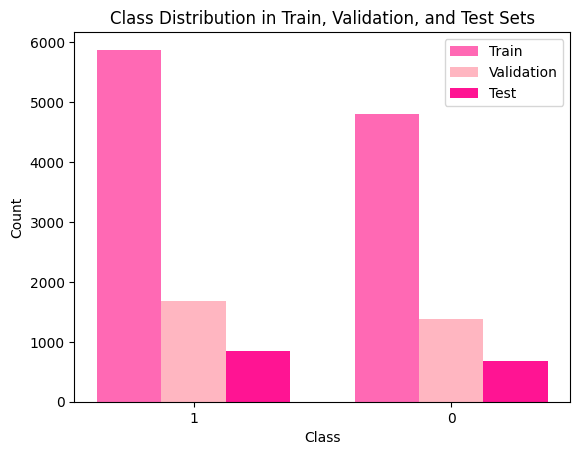

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Save the splits to CSV files
train_df = pd.read_csv('train.csv', encoding='latin-1')
val_df = pd.read_csv('val.csv', encoding='latin-1')
test_df = pd.read_csv('test.csv', encoding='latin-1')

print(len(train_df)+len(val_df)+len(test_df))

# Count the occurrences of each class in each dataframe
train_counts = train_df['safe'].value_counts()
val_counts = val_df['safe'].value_counts()
test_counts = test_df['safe'].value_counts()

# Define custom colors
colors = ['#ff69b4', '#ffb6c1', '#ff1493']  # Pink and complementary colors

# Create a bar graph
fig, ax = plt.subplots()

bar_width = 0.25
index = range(len(train_counts))

bar1 = plt.bar(index, train_counts, bar_width, label='Train', color=colors[0])
bar2 = plt.bar([i + bar_width for i in index], val_counts, bar_width, label='Validation', color=colors[1])
bar3 = plt.bar([i + 2 * bar_width for i in index], test_counts, bar_width, label='Test', color=colors[2])

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in Train, Validation, and Test Sets')
plt.xticks([i + bar_width for i in index], train_counts.index)
plt.legend()

plt.show()